In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit, differential_evolution
import csv
from data_read import data_read
from rebinning import rebinning
from fit import fit
from get_rates import get_rates
from get_bkg import get_bkg

In [2]:
#N/N90
x = np.array([180,
150,
120,
100,
90,
80,
60,
50,
])
y = np.array([0.979663763,
0.978729407,
1.04725141,
1.03187737,
1,
1.020082611,
1.050316553,
1.067429005
])
sy = np.array([
0.058896751,
0.059062641,
0.063525984,
0.063074751,
0.061550826,
0.062632204,
0.062946856,
0.06444996

])



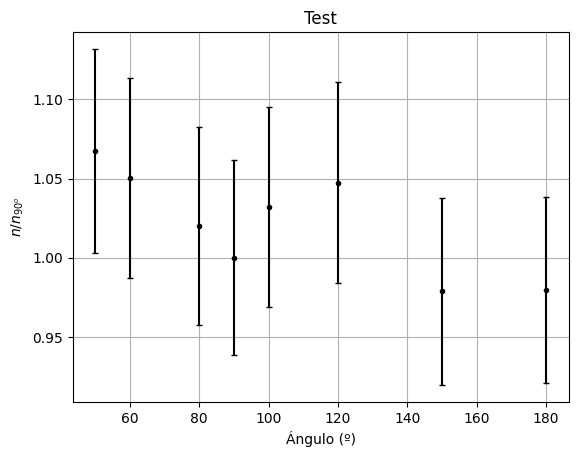

In [3]:
plt.errorbar(x, y, yerr=sy,capsize=2,fmt='.',c="black")
plt.title('Test')
plt.xlabel('Ángulo (º)')
plt.ylabel('$n/n_{90^o}$')
plt.grid()

plt.show()


In [4]:
def func(x,*p):
    return (p[0] + p[1]*(np.cos(x*np.pi/180))**2 + p[2]*(np.cos(x*np.pi/180))**4)
    

In [5]:
res_param, res_xi2, res_cov = fit(x[2:],y[2:],sy[2:],func,[1,1/8,1/24])
print(res_param)
print(res_xi2)

[ 1.01234023  0.19394243 -0.1562581 ]
0.031237185811453287


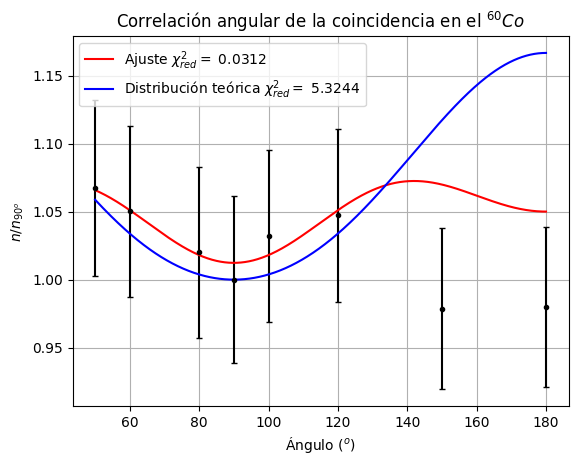

In [12]:
plt.errorbar(x, y, yerr=sy,capsize=2,fmt='.',c="black")
xx = np.linspace(50,180,num=1000)
plt.plot(xx, func(xx,*res_param), 'r-', label='Ajuste $χ^2_{red} =$ '+str(0.0312))
plt.plot(xx, func(xx,1,1/8,1/24), 'b-', label='Distribución teórica $χ^2_{red} =$ '+str(5.3244))
plt.title('Correlación angular de la coincidencia en el $^{60} Co$')
plt.xlabel('Ángulo ($^o$)')
plt.ylabel('$n/n_{90^o}$')
plt.grid()
plt.legend()
# plt.savefig('./Plots/Coincidencias/coincidencias.png')
plt.show()


In [7]:
for i in range(3):
    print(np.sqrt(res_cov[i,i]))

0.00740664068692912
0.10961417630811089
0.2765934284513583


In [8]:
def th_func(x):
    return (1 + (1/8)*(np.cos(x*np.pi/180))**2 + (1/24)*(np.cos(x*np.pi/180))**4)

In [9]:

N = 6
m = 3
print((1/(N-m))*sum((y-th_func(x))**2/(sy**2)))



5.324444730556093
